#### to-do
1. fix reward in training part
2. use data to validate logic
3. expand action space to be arbitrary length
4. expand number of assets to be arbitrary

In [1]:
!git clone https://github.com/sachink2010/AutomatedStockTrading-DeepQ-Learning.git

fatal: destination path 'AutomatedStockTrading-DeepQ-Learning' already exists and is not an empty directory.


In [2]:
%cd AutomatedStockTrading-DeepQ-Learning/

/content/AutomatedStockTrading-DeepQ-Learning


# Deep Q- learning Agent- Stock Trading

### Import- Data and Functions

<b> 
    We begin with inputing following variables:
    - Stock1_name: this is first stock name, which is Apple - aapl.us
    - Stock2_name: this is second stock name, which is Amazon - amzn.us
    - episode_count: This is number of episodes which agent till train on
    - Start_balance: This is the initial starting cash, which is $ 50,000
    - Training: This is number of records used for trading i.e. number of days on each episode of training will run
    - Test: This is number of days on which test run will be executed 
 
 </b>






In [33]:

from agent.agent_2 import Agent
from state.state_2 import State
import pandas as pd
from functions import *
import sys

import pandas as pd

import math, random 
import numpy as np 
from datetime import datetime, timedelta

#stock_name, window_size, episode_count = sys.argv[1], int(sys.argv[2]), int(sys.argv[3])

stock_name1,stock_name2, episode_count, start_balance, training, test = 'aapl.us','amzn.us', 51,10000,4000,500


pd_data1=pd.read_csv('data/aapl.us.txt', sep=",", header=0)
pd_data2=pd.read_csv('data/amzn.us.txt', sep=",", header=0)




### Data Pre-processing

In this section we will do the following:
1. Look at the data of Apple and Amazon stock for checking anamolies (missing data etc.). Also convert date into right format
2. Make sure that both the stock data is for the same time period and same days in this time period. Remove data if necessary
3. Look at descriptive statistics of data- mean, median, number of records
4. Visualize the data to see how stock price changes with time
    

#### View Apple Stock data

In [2]:

pd_data1.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


#### View Amazon Stock data


In [3]:

pd_data2.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0


#### Date in Above data is not in Dateformat, so converting date to date format 

In [4]:
#Convert  Date to Date format
pd_data1['Date']=pd.to_datetime(pd_data1['Date'], format='%Y/%m/%d')
pd_data2['Date']=pd.to_datetime(pd_data2['Date'], format='%Y/%m/%d')

In [49]:
# create data TS matrix
data = pd_data1[['Date', 'Close']].merge(pd_data2[['Date', 'Close']], on='Date', how='inner')
data = data.set_index('Date')
data

,Close_x,Close_y
Date,,
1997-05-16,0.5518,1.73
1997-05-19,0.5441,1.71
1997-05-20,0.5518,1.64
1997-05-21,0.5404,1.43
1997-05-22,0.5329,1.40
...,...,...
2017-11-06,173.6300,1120.66
2017-11-07,174.1800,1123.17
2017-11-08,175.6100,1132.88


In [51]:
# drop na
data.dropna(inplace=True)
data

,Close_x,Close_y
Date,,
1997-05-16,0.5518,1.73
1997-05-19,0.5441,1.71
1997-05-20,0.5518,1.64
1997-05-21,0.5404,1.43
1997-05-22,0.5329,1.40
...,...,...
2017-11-06,173.6300,1120.66
2017-11-07,174.1800,1123.17
2017-11-08,175.6100,1132.88


#### Desciptive statistics of Apple and Amazon data

Apple Stock- descriptive statistics

In [39]:
# pd_data1.describe()

Amazon Stock- descriptve statistics

In [40]:
# pd_data2.describe()

#### Drop Data that is not in both stock data- some days data is missing in Apple and some in Amazon

I have made another program to look at data that is common in both stocks and to find out if there are any anamolies. Using this program I found out some data that is missing in either Apple or Amazon stock data


In [42]:
# pd_data2['Date'][0]

In [41]:
# pd_data1['Date'][0]

In [9]:
# if (pd_data1['Date'][0]>pd_data2['Date'][0]): 
#     #print("Date1 is older than Date2")
#     pd_data1=pd_data1[pd_data1.Date>=pd_data2['Date'][0]]
#     pd_data1=pd_data1.reset_index(drop=True)
# else:
#     #print("Date2>Date1")
#     pd_data2=pd_data2[pd_data2.Date>=pd_data1['Date'][0]]
#     pd_data2=pd_data2.reset_index(drop=True)
#     #print("Date2>Date1  and date2 is" + str(pd_data2['Date'][0]) +" Date 1 is : "+ str(pd_data1['Date'][0]))

In [43]:
# pd_data2.describe()

In [44]:
# # Pre -Processing the Datasheet ...Drop Data that is not in both stock data- some days data is missing in Apple and some in Amazon
# import datetime
# #timestamp = data1_date[10]
# #print(timestamp.strftime('%Y-%m-%d'))
# list1= pd_data1['Date']
# list2= pd_data2['Date']
# diff_pd1_data = list(set(list1) - set(list2))
# diff_pd2_data = list(set(list2) - set(list1))
# #x11=x[0].strftime('%Y-%m-%d 00:00:00')
# #p=datetime.datetime.strptime(x11, "%Y-%m-%d 00:00:00")
# #print(p)
# for k in range(len(diff_pd1_data)):
#     pd1_dat_format=diff_pd1_data[k].strftime('%Y-%m-%d 00:00:00')
#     date_format_pd1=datetime.datetime.strptime(pd1_dat_format, "%Y-%m-%d 00:00:00")
#     for i, j in enumerate(list1):
#         if j == date_format_pd1:
#             #print(i)
#             pd_data1=pd_data1.drop([i])            
# pd_data1=pd_data1.reset_index(drop=True)

# for k in range(len(diff_pd2_data)):
#     pd2_dat_format=diff_pd2_data[k].strftime('%Y-%m-%d 00:00:00')
#     date_format_pd2=datetime.datetime.strptime(pd2_dat_format, "%Y-%m-%d 00:00:00")
#     for M, N in enumerate(list2):
#         if N == date_format_pd2:
#             #print(M)
#             pd_data2=pd_data2.drop([M])
            
# pd_data2=pd_data2.reset_index(drop=True) 


Now the data is clean, both Apple and Amazon have 5151 records

In [45]:
# pd_data1.describe()

In [46]:
# pd_data2.describe()

### Data Visualization

In [47]:
# # Apple Stock Plot
# import matplotlib.pyplot as plt
# import datetime
# import numpy as np

# %matplotlib inline

# x1 = np.array(pd_data1['Date'])
# y1 = pd_data1['Close']
# y12= pd_data1['Volume']

# plt.title("Apple Stock Performance Over years")
# plt.xlabel("Year")
# plt.ylabel("Price in $")



# plt.plot(x1,y1)


# ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
# ax2.plot(x1, y12, color=color)
# ax2.tick_params(axis='y', labelcolor=color)



# plt.show()

In [48]:
# # Amazon Stock Plot
# import matplotlib.pyplot as plt
# import datetime
# import numpy as np

# %matplotlib inline

# x2 = np.array(pd_data2['Date'])
# y2 = pd_data2['Close']
# y22= pd_data2['Volume']


# plt.title("Amazon Stock Performance Over years")
# plt.xlabel("Year")
# plt.ylabel("Price in $")

# plt.plot(x2,y2)


# ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:red'
# ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
# ax2.plot(x2, y22, color=color)
# ax2.tick_params(axis='y', labelcolor=color)




# plt.show()

### Divide Training and test data

Next step is to divide data into training and test set. This has to be done in a chronological order. So, data is divided into:
- training set from days 0 to days 'training'
- test set: from days 'training' to day 'training+ test'

In [55]:
data_train = data[:training]
data_test = data[training:]
data_train

,Close_x,Close_y
Date,,
1997-05-16,0.5518,1.73
1997-05-19,0.5441,1.71
1997-05-20,0.5518,1.64
1997-05-21,0.5404,1.43
1997-05-22,0.5329,1.40
...,...,...
2013-04-15,54.5600,267.72
2013-04-16,55.3920,272.34
2013-04-17,52.3460,267.40


In [16]:
# #Training Data
# pd_data1_train=pd_data1[0:training]
# pd_data2_train=pd_data2[0:training]

In [17]:
# #Test Data
# pd_data1_test=pd_data1[training:training+test]
# pd_data2_test=pd_data2[training:training+test]

In [19]:



# vol1_train=getStockVolVec(stock_name1)
# vol2_train=getStockVolVec(stock_name2)


In [52]:
# #Initialize state and set benchmarking model



# total_Prof=[]
# done=False


# batch_size = 64

# #Benchmark Model
# #In this model, we would divide 


# #Initialize state and set benchmarking model


# #print(df_data1)
# total_Prof=[]
# done=False

# Act_datasize = training
# batch_size = 64

# #Benchmark Model

# data1_train=pd_data1_train['Close']
# data2_train=pd_data2_train['Close']

# data1_date=pd_data1_train['Date']

# Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_train[0]))
# Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_train[0]))
# Act_Bench_Open_cash=start_balance/2




# ### Program to calculate benchmark profit


# #sell 10% of stock in 10 intervals

# interval=int(Act_datasize/10)
# Total_Stock1_Amount= 0
# Total_Stock2_Amount= 0
# stocks2Value = 0
# stocks1Value = 0

# Act_stocks1=np.floor(Act_Bench_Stock1_Bal /10)
# Act_stocks2=np.floor(Act_Bench_Stock2_Bal /10)
# #print(str(Act_stocks1))
# #print(str(Act_stocks2))

# remaining_stock1=Act_Bench_Stock1_Bal
# remaining_stock2=Act_Bench_Stock2_Bal
# ttl=0

# Benchmark_Port_Value=[]


# for j in range (interval,Act_datasize+1,interval):
#         #print("closing prices : " + str(data1_train[j-1]) )
#         Price_closing_Stock1=data1_train[j-1]
#         Price_closing_Stock2=data2_train[j-1]
        
#         date_stock1=data1_date[j-1].strftime('%Y-%m-%d')
#         #print(date_stock1)
                
#         stocks1Value= Act_stocks1 * Price_closing_Stock1
#         stocks2Value= Act_stocks2 * Price_closing_Stock2
#         remaining_stock1=remaining_stock1-Act_stocks1
#         remaining_stock2=remaining_stock2-Act_stocks2
#         #print("J is:"+ str(j))
        
        
        
#         Stock1_Port_value=remaining_stock1*Price_closing_Stock1
#         Stock2_Port_value=remaining_stock2*Price_closing_Stock2
#         Act_Bench_Open_cash=Act_Bench_Open_cash+stocks1Value+stocks2Value #Adding 10% sold value into open cash
        
#         Total_Portfolio_value=Act_Bench_Open_cash+Stock1_Port_value+Stock2_Port_value
#         Benchmark_Port_Value.append([date_stock1,Total_Portfolio_value])
        



# #print ("total_Test_Benchmark_amount : " +  str(Total_Portfolio_value))

# Training_Benchmark_Portfolio_Value= Total_Portfolio_value




# print("Benchmark_Profit is  " + str(Training_Benchmark_Portfolio_Value) +"with Apple Stocks:  " + str(remaining_stock1) + 
#       " and Amazon stocks:  "+ str(remaining_stock2) )


# #Define arrays to store per episode values 
# total_Prof=[]
# total_stock1bal=[]
# total_stock2bal=[]
# total_open_cash=[]
# total_port_value=[]
# total_days_played=[]





In [56]:
# # pd_data1_train['Close']
# # y2
# start_balance/4
# data1_train[0]

# # 
# data = pd.DataFrame([data1_train,data2_train]).T
# data

# Training Run

In [57]:
#Training run

import csv

window_size = 10
num_stocks = data.shape[1]
print('num_stocks', nom_stocks)
transaction_cost = 0.01 # 1% of price change


for e in range(episode_count + 1):
    print("..........")
    print("Episode " + str(e) + "/" + str(episode_count))
    
    Bal_stocks= np.array([0, 0]) #int(np.floor((start_balance/4)/data1_train[0]))
#     Bal_stock2=int(np.floor((start_balance/4)/data2_train[0]))
    open_cash=start_balance #/2
    
    datasize=training
    done=False
    total_profit = 0
    reward = 0
    
    #Initialize Agent
    agent = Agent(10)
    agent.inventory = []
    agent.inventory.append(Bal_stocks)
# #     agent.inventory2 =[]
#     for i in range(Bal_stock1):
#         agent.inventory1.append(data1_train[0])
#     for i in range(Bal_stock2):
#         agent.inventory2.append(data2_train[0]) 
    
    
    #Timestep delta to make sure that with time reward increases for taking action
    #timestep_delta=0
    
    #Running episode over all days in the datasize
    for t in range(datasize):
        #print("..........")
        #print(pd_data1_train.iloc[t,0])
        state_class_obj= State(data_train, Bal_stocks, open_cash,t)
        state=state_class_obj.getState() # list of [stockprices, stockblncs, open_cash, fiveday_stocks, portfolio_value] @ time t
        action = agent.act(state)
         
                   
        change_percent_stocks=(state_class_obj.StockPrices-state_class_obj.fiveday_stocks)/state_class_obj.fiveday_stocks*100
#         change_percent_stock2=(state_class_obj.-state_class_obj.fiveday_stock2)/state_class_obj.fiveday_stock2*100
        
        #print("change_percent_stock1:  "+str(change_percent_stock1))
        #print("change_percent_stock2:  "+str(change_percent_stock2))
        
        
        if action == 0: # long-short, can still buy even with insufficient cash 
#         and state_class_obj.StockPrices[0] <= state_class_obj.open_cash:  #buy stock 1
            last_inventory = agent.inventory[-1]
            Bal_stocks_t1 = np.array([last_inventory[0] + 1, 0])
            agent.inventory.append(Bal_stocks_t1) # inventory is expressed as # of stocks
#             Bal_stock2_t1=len(agent.inventory2)
            open_cash_t1=state_class_obj.open_cash-state_class_obj.StockPrices[0] #Here we are buying 1 stock
            reward = np.sum(Bal_stocks_t1 * state_class_obj.StockPrices) + open_cash_t1 - transaction_cost * (change_percent_stocks/100) * state_class_obj.fiveday_stocks
                               
        if action == 1:  #sell stock 1
            last_inventory = agent.inventory[-1]
            bought_price1=agent.inventory1.pop(0)
            Bal_stock1_t1= len(agent.inventory1)
            Bal_stock2_t1=len(agent.inventory2)
            open_cash_t1=state_class_obj.open_cash+state_class_obj.StockPrices #State[0] is the price of stock 1. Here we are buying 1 stoc

            if(state_class_obj.Stock1Blnc<10):
                reward=-100000
            elif (abs(change_percent_stock1)<=2):
                reward=-10000
            else:
                reward=change_percent_stock1*100 #State[0] is the price of stock 1. Here we are buying 1 stock
                
        if action == 2:             # Do nothing action    
                if (abs(change_percent_stock1)<=2) and (abs(change_percent_stock2)<=2):
                    reward=10000
                elif (state_class_obj.open_cash<0.1*start_balance):
                    reward=1000000
                elif (abs(change_percent_stock1)<=2) or (abs(change_percent_stock2)<=2):
                    reward=1000
                else:
                    reward=-100000
                
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=open_cash
               # print("Do nothing")
        
        
        if action == 3:  #buy stock 2
            if state_class_obj. > state_class_obj.open_cash:
                '''
                print("Buy stock 2 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                
                '''
                #If agent is trying to buy when it has no cash but has stock1 and stock2 balance then, 
                #it should pick from other actions
                #if (state_class_obj.Stock1Blnc>1) and  (state_class_obj.Stock2Blnc>1):
                 #   action=random.sample([1, 2, 4, 5, 6],  1)  # Choose 1 elements from sell actions
                #else:    
                #print("Bankrupt")
                reward=-200000
                done = True
                     #end episode   
            else:
                #print("In Buy stock 2")
                agent.inventory2.append(data2_train[t])
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=state_class_obj.open_cash-state_class_obj.
                
                if(state_class_obj.open_cash<5000):
                    reward=-100000
                elif (abs(change_percent_stock2)<=2):
                    reward=-10000
                else:
                    reward=-change_percent_stock2*100
 
        
        if action == 4:  #sell stock 2
            if state_class_obj.Stock2Blnc <1 :
                    #print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                    reward=-200000
                    done = True
                #end episode
            else:
                #print("In sell stock 2")
                bought_price2=agent.inventory2.pop(0)
                Bal_stock1_t1= len(agent.inventory1)
                Bal_stock2_t1=len(agent.inventory2)
                open_cash_t1=state_class_obj.open_cash+state_class_obj.
    
              
                if(state_class_obj.Stock2Blnc<10):
                    reward=-100000
                elif (abs(change_percent_stock2)<=2):
                    reward=-10000
                else:
                    reward=change_percent_stock2*100 
                
                
                total_profit += state_class_obj. - bought_price2

               # print("reward for selling stock2: " + str(reward))
            
        
        
        #print("reward:  "+str(reward))
        #if done!= False:done = True if t == datasize
        if t == datasize-1:
            #print("t==datasize")
            done=True
            next_state_class_obj=State(data1_train, data2_train, Bal_stock1_t1, Bal_stock2_t1, open_cash_t1,t)
            next_state_array_obj=next_state_class_obj.getState()
        else:
            next_state_class_obj=State(data1_train, data2_train, Bal_stock1_t1, Bal_stock2_t1, open_cash_t1,t+1)
            next_state_array_obj=next_state_class_obj.getState()
            
        agent.memory.append((state_array_obj, action, reward, next_state_array_obj, done))
        #print("Action is "+str(action)+" reward is" + str(reward))
         
        Bal_stock1=Bal_stock1_t1
        Bal_stock2= Bal_stock2_t1
        open_cash=open_cash_t1
        
        
      #  print("total_profit on day basis " + str(total_profit) +"on day"+str(t) + "stock 1 number: " + 
        #      str(len(agent.inventory1))+"/"+str(next_state_class_obj.Stock1Blnc)+" stock2 number:"+
         #         str(len(agent.inventory2)) +"/"+str(next_state_class_obj.Stock2Blnc)+
          #        "open cash: "+str(next_state_class_obj.open_cash))
        
       # print("doneAction" + str(done))
       # print("--------------------------------") 
       
        
        
        if done==True:
            #print("--------------------------------")
           # print("Total Profit: " + formatPrice(total_profit))
           # print("Total No. of days played: " + str(t)+ "  out of overall days:  " + str(datasize))
           # print("Total portfolio value: " + str(next_state_class_obj.portfolio_value)+ 
             #     "  stock 1 number: " + str(len(agent.inventory1))
            #      +"  stock 2 number: "+str(len(agent.inventory2))+"  open cash"+str(next_state_class_obj.open_cash))

            total_Prof.append(total_profit)
            total_stock1bal.append(len(agent.inventory1))
            total_stock2bal.append(len(agent.inventory2))
            total_open_cash.append(state_class_obj.open_cash)
            total_port_value.append(state_class_obj.portfolio_value)
            total_days_played.append(t)


            print("--------------------------------")
            state_class_obj.reset()
            break
           
          

        if len(agent.memory) > batch_size:
            agent.expReplay(batch_size)


    if e % 10 == 0:
        agent.model.save("models/model_ep" + str(e))
        

        
#print("Total Apple stocks in episodes"+ str(total_stock1bal))
#print("Total Amazon stocks in episodes"+ str(total_stock2bal))
#print("Total Open cash in episodes"+ str(total_open_cash))
#print("Total Portfolio value in episodes"+ str(total_port_value))
#print("Total Days in episodes"+ str(total_days_played))
#print("Benchmark_Profit is  " + str(int(Benchmark_Portfolio_Value)) +"   with Apple Stocks: " + str(Bench_Stock1_Bal) + 
    #  "   and Amazon stocks: "+ str(Bench_Stock2_Bal) )





SyntaxError: invalid syntax (<ipython-input-57-520027296560>, line 45)

In [23]:
print("Total Apple stocks in episodes"+ str(total_stock1bal))
print("Total Amazon stocks in episodes"+ str(total_stock2bal))
print("Total Open cash in episodes"+ str(total_open_cash))
print("Total Portfolio value in episodes"+ str(total_port_value))
print("Total Days in episodes"+ str(total_days_played))

print("Benchmark_Profit is  " + str(int(Training_Benchmark_Portfolio_Value)) +"   with remaining Apple Stocks: " + str(remaining_stock1) + 
      "   and remaining Amazon stocks: "+ str(remaining_stock2) )

Total Apple stocks in episodes[5712, 5698, 4444, 4460, 4447, 4469, 3535, 5689, 3218, 4444, 5659, 4455, 5684, 4438, 4449, 4291, 4443, 4453, 5682, 4460, 5686, 4461, 4932, 5684, 4454, 4453, 3205, 5656, 4039, 5529, 5678, 4987, 4448, 4804, 3218, 5695, 4445, 4462, 4455, 4458, 4445, 4449, 3262, 4454, 3244, 4458, 4461, 4448, 5708, 5700, 4455, 3219]
Total Amazon stocks in episodes[1276, 1263, 1216, 44, 1489, 1460, 1562, 1258, 1275, 46, 1190, 1086, 1261, 47, 1273, 1423, 1262, 1272, 1253, 1497, 1285, 29, 501, 1256, 1494, 32, 1281, 1279, 1280, 1275, 1254, 1560, 39, 1276, 1266, 1259, 25, 1491, 1253, 1445, 68, 24, 1262, 37, 1262, 1496, 1140, 1487, 1250, 1284, 1485, 1259]
Total Open cash in episodes[2707.483719999995, 3006.989340000002, 5303.422120000001, 43889.655340000005, 56.324140000007446, 46.068210000000875, 943.3703700000099, 2932.5059600000013, 6929.726420000014, 43770.43110999998, 3663.8084399999952, 29580.18246999994, 3269.336940000003, 43676.748649999965, 5089.107030000003, 55.818140000005

In [24]:
pd_data1_test=pd_data1_test.reset_index(drop=True)
pd_data2_test=pd_data2_test.reset_index(drop=True)

In [25]:
pd_data1_test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2003-05-15,1.1910,1.2076,1.1820,1.1999,79866509,0
1,2003-05-16,1.1898,1.2167,1.1704,1.2037,94069639,0
2,2003-05-19,1.1871,1.1935,1.1563,1.1589,124591981,0
3,2003-05-20,1.1589,1.1628,1.1271,1.1385,116368335,0
4,2003-05-21,1.1385,1.1577,1.1320,1.1437,85352801,0


In [26]:
pd_data2_test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2003-05-15,32.64,32.75,32.20,32.63,5222009,0
1,2003-05-16,32.51,33.16,32.38,33.05,7654816,0
2,2003-05-19,32.70,32.97,31.40,31.56,9798178,0
3,2003-05-20,31.56,32.13,31.17,31.48,8093492,0
4,2003-05-21,31.48,31.84,31.16,31.75,5217622,0


## Benchmark model for Actual Test Run

In [27]:
#Initialize state and set benchmarking model

import datetime

#print(df_data1)
total_Prof=[]
done=False

Act_datasize = test
batch_size = 64


#To be removed
#Sstart_balance=500

#Benchmark Model

# Take Opening price in a new variable
data1_test=pd_data1_test['Open']
data2_test=pd_data2_test['Open']

data1_date=pd_data1_test['Date']



Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0]))
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0]))
Act_Bench_Open_cash=start_balance/2




### Program to calculate benchmark profit


#sell 10% of stock in 10 intervals

interval=int(Act_datasize/10)
Total_Stock1_Amount= 0
Total_Stock2_Amount= 0
stocks2Value = 0
stocks1Value = 0

Act_stocks1=np.floor(Act_Bench_Stock1_Bal /10)
Act_stocks2=np.floor(Act_Bench_Stock2_Bal /10)
#print(str(Act_stocks1))
#print(str(Act_stocks2))

remaining_stock1=Act_Bench_Stock1_Bal
remaining_stock2=Act_Bench_Stock2_Bal
ttl=0

Benchmark_Port_Value=[]


for j in range (interval,Act_datasize+1,interval):
        #print("closing prices : " + str(data1_test[j-1]) )
        Price_closing_Stock1=data1_test[j-1]
        Price_closing_Stock2=data2_test[j-1]
        date_stock1=data1_date[j-1].strftime('%Y-%m-%d')
        #print(date_stock1)
        #np.array(pd_data1_test['Date'])
        
        stocks1Value= Act_stocks1 * Price_closing_Stock1
        stocks2Value= Act_stocks2 * Price_closing_Stock2
        remaining_stock1=remaining_stock1-Act_stocks1
        remaining_stock2=remaining_stock2-Act_stocks2
        #print("J is:"+ str(j))
        
        
        
        Stock1_Port_value=remaining_stock1*Price_closing_Stock1
        Stock2_Port_value=remaining_stock2*Price_closing_Stock2
        Act_Bench_Open_cash=Act_Bench_Open_cash+stocks1Value+stocks2Value #Adding 10% sold value into open cash
        
        Total_Portfolio_value=Act_Bench_Open_cash+Stock1_Port_value+Stock2_Port_value
        Benchmark_Port_Value.append([date_stock1,Total_Portfolio_value])
        



#print ("total_Test_Benchmark_amount : " +  str(Total_Portfolio_value))

Test_Benchmark_Portfolio_Value= Total_Portfolio_value




print("Benchmark_Profit is" + str(Test_Benchmark_Portfolio_Value) +"with remaining Apple Stocks: " + str(remaining_stock1) + 
      " and remaining Amazon stocks: "+ str(remaining_stock2) )


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]


print(episode_count)


Benchmark_Profit is13725.1903with remaining Apple Stocks: 9.0 and remaining Amazon stocks: 6.0
51


## Actual test Run

In [0]:
#Actual run

import csv
episode_count=0


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]

from keras.models import load_model

model_name='model_ep10'

model = load_model("models/" + model_name)

Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0]))
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0]))
Act_Bench_Open_cash=start_balance/2


In [33]:
#Actual run

import csv
episode_count=0


#Define arrays to store per episode values 
Act_total_Prof=[]
Act_total_stock1bal=[]
Act_total_stock2bal=[]
Act_total_open_cash=[]
Act_total_port_value=[]
Act_total_days_played=[]
actions_done_perday=[]
portfolio_value=[]

from keras.models import load_model

model_name='model_ep50'

model = load_model("models/" + model_name)

initial_cash = state_class_obj.portfolio_value

for e in range(1): #here we run only for 1 episode, as it is Test run

    Bal_stock1_t2=Act_Bench_Stock1_Bal
    Bal_stock2_t2=Act_Bench_Stock2_Bal
    done=False
    open_cash_t2= Act_Bench_Open_cash  
    total_profit = 0
    reward = 0
    
    #Initialize Agent
    agent_test = Agent(8, is_eval=True, model_name=model_name)
    #agent = Agent(8)

    agent_test.inventory1 =[]
    agent_test.inventory2 =[]
    for i in range(Bal_stock1_t2):
        agent_test.inventory1.append(data1_test[0])
    for i in range(Bal_stock2_t2):
        agent_test.inventory2.append(data2_test[0]) 
    
    
    #Timestep delta to make sure that with time reward increases for taking action
    timestep_delta=0
    
    #Running episode over all days in the datasize
    for t in range(Act_datasize):
        print("..........")
        
        print(pd_data1_test.iloc[t,0])
        state_class_obj= State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
        state_array_obj=state_class_obj.getState()
        action = agent_test.act(state_array_obj)
        
        print("Total portfolio value: " + str(state_class_obj.portfolio_value)+ 
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash"+str(state_class_obj.open_cash))


        
        #reward should be more as time goes further. We will remove reward_timedelta from actual reward 
        #reward_timedelta=(datasize-t)*timestep_delta
        
                   
        change_percent_stock1=(state_class_obj.StockPrices-state_class_obj.fiveday_stock1)/state_class_obj.fiveday_stock1*100
        change_percent_stock2=(state_class_obj.-state_class_obj.fiveday_stock2)/state_class_obj.fiveday_stock2*100
        
        #print("change_percent_stock1:  "+str(change_percent_stock1))
        #print("change_percent_stock2:  "+str(change_percent_stock2))
        
        
        if action == 0:  #buy stock 1
            if state_class_obj.StockPrices > state_class_obj.open_cash:
                '''
                print("Buy stock 1 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                '''
                #If agent is trying to buy when it has no cash but has stock1 and stock2 balance then, 
                #it should pick from other actions
                #if (state_class_obj.Stock1Blnc>1) and  (state_class_obj.Stock2Blnc>1):
                 #   action=random.sample([1, 2, 4, 5, 6],  1)  # Choose 1 elements from sell actions
                #else:    
                #print("Bankrupt")
              
                done = True
                #end episode
                     
            else:
                #print("In Buy stock 1")
                agent_test.inventory1.append(data1_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.StockPrices #Here we are buying 1 stock
                
                
               
                
        if action == 1:  #sell stock 1
            if state_class_obj.Stock1Blnc <1 :
               # print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                
                done = True
                #end episode
            else:
                #print("In sell stock 1")
                agent_test.inventory1.pop(0)

                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.StockPrices #State[0] is the price of stock 1. Here we are buying 1 stoc
          
                 
        


        
        if action == 2:             # Do nothing action    
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
               # print("Do nothing")
        
        
        if action == 3:  #buy stock 2
            if state_class_obj. > state_class_obj.open_cash:
                '''
                print("Buy stock 2 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                
                '''
                #If agent is trying to buy when it has no cash but has stock1 and stock2 balance then, 
                #it should pick from other actions
                #if (state_class_obj.Stock1Blnc>1) and  (state_class_obj.Stock2Blnc>1):
                 #   action=random.sample([1, 2, 4, 5, 6],  1)  # Choose 1 elements from sell actions
                #else:    
                #print("Bankrupt")

                done = True
                     #end episode   
            else:
                #print("In Buy stock 2")
                agent.inventory2.append(data2_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.
                
              
        
        if action == 4:  #sell stock 2
            if state_class_obj.Stock2Blnc <1 :
                    #print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                    done = True
                #end episode
            else:
                #print("In sell stock 2")
                agent_test.inventory2.pop(0)
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.
    

               # print("reward for selling stock2: " + str(reward))
            
        
        
        #print("reward:  "+str(reward))
        #if done!= False:done = True if t == datasize
        if t == Act_datasize-1:
            #print("t==datasize")
            done=True
            next_state_class_obj=State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
            next_state_array_obj=next_state_class_obj.getState()
        else:
            #print("t!=datasize"+str(open_cash_t2))
            next_state_class_obj=State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t+1)
            next_state_array_obj=next_state_class_obj.getState()
            
        #print("Action is "+str(action)+" reward is" + str(reward))


       
        
        actions_done_perday.append(action)
        portfolio_value.append(next_state_class_obj.portfolio_value)

        if done==True:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(next_state_class_obj.portfolio_value - initial_cash))
            print("Total No. of days played: " + str(t)+ "  out of overall days:  " + str(Act_datasize))
            print("Total portfolio value: " + str(next_state_class_obj.portfolio_value)+ 
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash"+str(next_state_class_obj.open_cash))

            Act_total_Prof.append(total_profit)
            Act_total_stock1bal.append(len(agent_test.inventory1))
            Act_total_stock2bal.append(len(agent_test.inventory2))
            Act_total_open_cash.append(state_class_obj.open_cash)
            Act_total_port_value.append(state_class_obj.portfolio_value)
            Act_total_days_played.append(t)


            print("--------------------------------")
            state_class_obj.reset()
            break



..........
2003-05-15 00:00:00
Total portfolio value: 9980.548999999999  stock 1 number: 2099  stock 2 number: 76  open cash5000.0
..........
2003-05-16 00:00:00
Total portfolio value: 9968.151399999999  stock 1 number: 2098  stock 2 number: 76  open cash5001.191
..........
2003-05-19 00:00:00
Total portfolio value: 9976.9295  stock 1 number: 2097  stock 2 number: 76  open cash5002.3808
..........
2003-05-20 00:00:00
Total portfolio value: 9831.1823  stock 1 number: 2096  stock 2 number: 76  open cash5003.5679
..........
2003-05-21 00:00:00
Total portfolio value: 9782.364300000001  stock 1 number: 2095  stock 2 number: 76  open cash5004.7268
..........
2003-05-22 00:00:00
Total portfolio value: 9819.0081  stock 1 number: 2094  stock 2 number: 76  open cash5005.8653
..........
2003-05-23 00:00:00
Total portfolio value: 9959.1946  stock 1 number: 2093  stock 2 number: 76  open cash5007.0115000000005
..........
2003-05-27 00:00:00
Total portfolio value: 9887.9874  stock 1 number: 2092  st

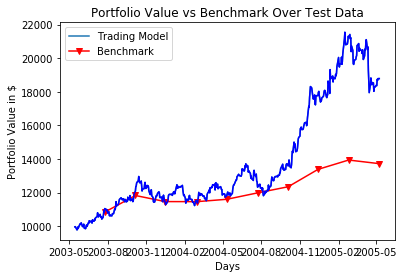

In [0]:
# Test Stock Prices and actions taken by agent Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

pd_bm=pd.DataFrame.from_records(Benchmark_Port_Value)
pd_bm[0]=pd.to_datetime(pd_bm[0], format='%Y/%m/%d')

x1 = np.array(pd_data1_test['Date'])
y1 = portfolio_value

x2=pd_bm[0]
y2=pd_bm[1]



plt.title("Portfolio Value vs Benchmark Over Test Data")
plt.xlabel("Days")
plt.ylabel("Portfolio Value in $")

plt.plot(x1,y1)
plt.plot_date(x2, y2, c = 'red', marker='v', linestyle='-')


#plt.plot(x1, z, '-', color='black');
plt.plot(x1, y1, '-', color='blue');



#plt.scatter(x1,Benchmark_Port_Value,marker='o')

plt.legend(('Trading Model', 'Benchmark'))

plt.show()